#  1. Voting Classifier

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
cancer.data # features

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [14]:
cancer.filename

'/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/datasets/data/breast_cancer.csv'

In [16]:
data = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [17]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Voting Classifier 생성 및 기본 모델

In [26]:
lr_clf = LogisticRegression(max_iter=2000)
dt_clf = DecisionTreeClassifier()
KNN_clf = KNeighborsClassifier()

vo_clf = VotingClassifier(estimators = [('LR',lr_clf), ('DT',dt_clf), ('KNN',KNN_clf)],
                         voting = 'soft')

##### soft : 0일 확률, 1일 확률을 모두 고려해서 다수결
##### n_jobs = -1 : CPU를 다 써라 (병렬처리)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.3,
                                                   random_state = 100)

In [27]:
vo_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=2000)),
                             ('DT', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier())],
                 voting='soft')

## 정확도 출력 _ score()

In [28]:
vo_clf.score(X_test, y_test)

0.9590643274853801

##### 각각의 분류기들에 대한 정확도를 보고싶다면?

In [33]:
vo_clf.named_estimators_

{'LR': LogisticRegression(max_iter=2000),
 'DT': DecisionTreeClassifier(),
 'KNN': KNeighborsClassifier()}

- items() 는 위의 named_estimators_가 사전타입이기 때문에 items를 써야한다고 함

In [40]:
for name, clf in vo_clf.named_estimators_.items():
    #print(name, clf)
    print('{0} : {1:.3f}'.format(name, clf.score(X_test, y_test)))
   # print(clf.score(X_test, y_test))

LR : 0.953
DT : 0.936
KNN : 0.942


# Bagging

- RandomForest
- 서로 다른 데이터로 서로 다른 여러 개의 분류기를 생성하여 투표를 통해 다수결. 
- 서로 다른 데이터셋 만들 때에 어떻게하지? 
   * 데이터를 쪼갠다. (ex. 300개 -> 100개씩) => 별론데? 
   * 그냥 데이터 1/n 하면 각 모델 성능이 잘 안나올거같아. 
   * 다 Strong할 필요는 없지만, 데이터셋 크기가 줄어들면 치명적이니까 이 방법은 안될 것 같다. 
   *  => 데이터 크기는 그대로 300개 맞춰주는게 좋다. (데이터 유실 없이) 
- 복원추출 _ replace 
   * 각기 다르게 뽑아. -> 엄밀히 말하면 다른 데이터가 된다. 
   * 똑같은 데이터의 중복을 허용하기 때문에 300개씩 만들 수 있다.
- 총 100개 중 30개는 안뽑힌다고 한다. 
    * -> 각 중복되어있는 데이터로 모델 만든다. (tree 계열로 많이 만든다) 
    * 교차검증이랑 비슷한 개념으로 한번도 트레인 데이터에 뽑히지 못한 애들을 test 데이터로 활용한다. 
    * = out-of-back ERROR 
- RANDOMFOREST
    * 배깅까지는 똑같고 이걸로 결정트리를 여러개 만든다. 
    * 어느 정도의 랜덤성을 갖고 있기 때문에 랜덤포레스트 
    * 배깅 + 결정트리 
    * 서로 다른 데이터셋 만들어서 결정트리 만든다. (간단) 
    * 성능 꽤 좋다. 
    * 장점: 원래의 결정트리 단점인 데이터에 대한 민감성이 여기서는 장점이 된다. 
    * => 데이터셋이 달라지니까 서로 다른 모델을 만들게 된다. (데이터에 대한 민감성) 
    * 서로 다른 모델이 만들어져야 의미가 있으니 원래의 단점이 이제는 장점이 된다. 
    * 결국은 한 주머니에서 나온 데이터셋 => 어느정도의 차이는 있지만 그것만으로는 모델을 다양하게 만들기에 부족하다 하여 
        모든 feature로 학습하지 말고 랜덤하게 선택된 일부의 feature로만 학습 
              ex. 모델 1 만들 때에는 feature 1, 모델 2에는 feature 2, 3 모델 3에는 1, 3, 5
                   ==> 각각의 모델들이 굉장히 많이 달라질 것이다. 
                       

#### randomforest 함수 
- n_estimators: 결정트리의 개수, 값이 클수록 좋은 성능을 기대할 수 있지만, 학습 시간이 오래걸린다. 
- max_features는 랜덤하게 feature를 선택하도록 'auto'가 기본값 
- bootsrap: 서로 다른 데이터셋을 가지고 트리를 만들게 함. 기본값은 True , False로 하면 전체 데이터셋이 각각의 트리를 만들 때 사용 (보팅처럼) 
- oob_score : Out-of-back score를 사용할지 말지 기본값은 False ==> bootstrap을 사용해야지만 의미가 있는 인자값 
    * bootstrap이 True일 때에만 oob_score = True 할 수 있음
- n_jobs : CPU 다쓸지, 하나만 쓸지 (병렬처리) 기본값은 1. -1로 하면 병렬처리 하게한다. 
- max_samples : int / fload 기본값은 None : 전체 샘플 개수만큼 씀. 
    * bootstrap이 True여야 의미가 있음. False 면 의미없음 
- max_depth : int / 기본값 None, ( 숫자값 하나만 들어갈 수 있음 ) 

- 앙상블 단점: 
    * 모델의 개수가 많을수록 원래 좋아지는데 (학습량이 늘어나서) 학습시간에 대한 제약이 존재한다. 
- 랜덤포레스트 단점: 
    * 트리를 여러개 만들 때 독립적으로 모델을 만들기 때문에 병렬처리 가능(학습시간 다른것보다 빠르다. )
        ==> 성능도 꽤 괜찮다. 

# RandomForest 실습

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#### 모델 생성

In [42]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

RandomForestClassifier()

#### 정확도 

In [43]:
rf_clf.score(X_test, y_test)

0.9649122807017544

#### GridSearchCV로 최적화하기

In [46]:
params = {
    'n_estimators':[100, 500, 1000],
    'max_depth' : [3, 5, 7],
    'min_samples_split' : [10, 20],
    'n_jobs':[-1]
}
grid_dt = GridSearchCV(rf_clf, param_grid = params, cv=5, n_jobs=-1)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_split': [10, 20],
                         'n_estimators': [100, 500, 1000], 'n_jobs': [-1]})

In [47]:
print('최적의 파라미터: ', grid_dt.best_params_)
print('최고 예측 정확도: ', grid_dt.best_score_)

최적의 파라미터:  {'max_depth': 7, 'min_samples_split': 20, 'n_estimators': 100, 'n_jobs': -1}
최고 예측 정확도:  0.9572784810126581


- 최적의 파라미터를 보여준다. 
- 최고 예측 정확도는 대략 95%

In [48]:
grid_dt.score(X_test, y_test)

0.935672514619883

In [50]:
imp = pd.DataFrame({
    'feature': cancer.feature_names,
    'importance': grid_dt.best_estimator_.feature_importances_
})

<AxesSubplot:ylabel='feature'>

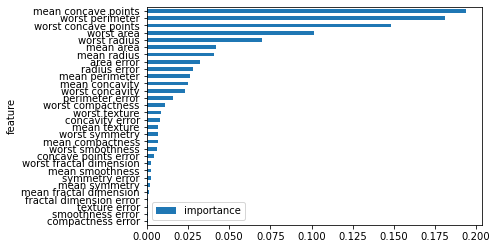

In [54]:
imp.sort_values(by='importance').plot(kind = 'barh', x='feature', y='importance')

In [57]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2))
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

In [58]:
ada.base_estimator_

DecisionTreeClassifier(max_depth=2)

from sklearn.metrics import accuracy_score # = score() 


# Boosting 

- 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 개선시키는 방식 
- 이전에 틀렸던 애들을 더 학습시키는 방법 
- 여러개의 분류기가 순차적으로 학습한다. 
    * 하나의 트리 다 만들고 틀린애들에 가중치 줘서 그 다음 모델 만든다. 
        모델2가 틀린애들에 가중치 줘서 모델3 주는 방식으로 순차적으로 수행 
    * 랜덤포레스트에서는 병렬처리하기가 쉬웠다.(독립으로 모델을 만드니까) 근데 부스팅은 모델 1이 끝나야지만 가중치를 주고 모델 2를 만드는 방식이기 때문에 CPU가 여러개여도 병렬처리할 수 없다. (모델2는 모델1이 끝나야지만 만들 수 있으니까) 
    * ==> 학습 속도가 매우 느리다. 
        하지만 가장 예측 성능이 뛰어나다. 
- Adaboost 
    * 복원추출을 통해서 다음 모델이 쓸 데이터를 복원추출 
        오답에는 높은 가중치, 정답에는 낮은 가중치를 줘서 다음 데이터셋을 만들 때 적용 
            ==> 오답 데이터를 더 많이 선택할 수 있도록 한다. 
            * 모델2는 모델1에 비해 모델1이 틀렸던 애들을 중복되어서 더 많이 들어가있는 데이터로 모델 넣음 
                => 오답이 줄어든다. 
            * 모델2가 틀린애들에 더 가중치를 준 데이터로 모델3 만든다. 
- 예제) 
* stump: 노드 하나에 2개의 리프 노드를 가진 트리 
* Adaboost는 이러한 stump 여러개를 가지고 있다. 
    * 단지, 그 스텀프들이 각각 가중치가 다르다. 
    * 가중치 = Amount of Say
- 심장병 데이터 
    * 처음엔 가중치가 똑같다. 
    * 전체 데이터를 가지고 depth가 1 짜리인 stump 하나 만든다. 
        => Chest Patin을 기준으로 나눌 수도 있고, Bloacked Arteries, Weight로 시작점을 지정할 수도 있다. 
    * 3개의 stump 만들 수 있다. 
    * 가슴통증이 있는 사람 중 심장병이 있는 사람 
    * 불순도 측정해서 (몇개를 맞추고 몇개를 틀렸는지)로 첫번째 모델 고른다. (첫번째 스텀프로 몸무게 골랐다)
        * 몸무게가 176보다 작은데도 불구하고 심장병이 있다 : 틀린 데이터 
        * ==> 첫번째 스텀프 중 틀린 데이터에 가중치를 줘서 다음 모델이 이 데이터를 더 많이 학습하도록 한다.
        * (Gini index가 가장 작은걸로 스텀프 고른다) 
        * 가중치: 에러가 낮을수록 에러가 없을수록 가중치는 내려간다. 
        * 각 스텀프의 가중치 구한다. 
            => 이걸 기반으로 샘플웨이트 구한다. == 오분류 : e^(0.97) / 정답분류 : e^(-0.97) ==> 틀린거에 가중치 높이기 
        * 가중치 높이면 아까 틀렸던 데이터만 0.49 나머지는 0.07 : 모든 가중치를 더하면 1이 되도록 normalize한 결과이다. 
        * 이 가중치에 의해서 두번째 데이터셋을 생성 
    * 가중치가 높은애들 많이 선택된다. (다음 모델 생성에 필요한 데이터를 생성할 때) 

- AdaboostClassifier 주요 인자 
    * base_estimator : 각각의 스텀프 , 기본값 None을 사용하게 되면 max_depth = 1 짜리가 베이스가 된다. 
    * 스텀프 1짜리는 좀 그렇다 하면 max_depth = 2짜리를 만들어서 base_estimator에 넣어주면 된다. 
    * 꼭 의사결정트리로 하지 않아도 된다. 
    * 꼭 depth 1짜리일 필요는 없다. 
    * n_estimators: 스텀프를 몇개 만들거냐? (기본 50) 
    * learning_rate : 가중치를 얼마나 많이 줄건가 default= 1 실수값 입력가능 
        * 러닝레잇 높이면 n_estimators는 줄이는 반비례 관계가 있다. 
    * algorithm : 'SAMME', 'SAMME.R'-> 기본값 
        * SAMME.R이 가장 성능 좋다고 한다. 



- GBM(Gradient Boosting Machine) 요즘 많이 쓴다. 
    * 부스팅 계열의 알고리즘이기 때문에 틀린애들 보정하고 넘어가는것 동일 
    * 그런데 GBM은 잔차를 예측해서 새로운 모델을 생성하는 것이다 .
    * 처음에 트리를 만들면, 단차를 예측 다음 모델은 이전모델의 잔차를 예측하는 모델
   * 예제_ 
       * 키, 좋아하는 색상, 성별로 몸무게를 예측해보려 한다. 
       * 